<a href="https://colab.research.google.com/github/sashank1326/ML_Practice/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, Birch, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/ML_LAB/Live.csv")
df.head(3)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(['status_id', 'status_type', 'status_published',
              'Column1', 'Column2', 'Column3', 'Column4'], axis=1)


In [ ]:
# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
# Create KMeans model
kmeans = KMeans(n_clusters=4, random_state=0)
# Fit model
kmeans.fit(X)
# Get cluster labels
labels = kmeans.labels_
# Get centroids
centroids = kmeans.cluster_centers_

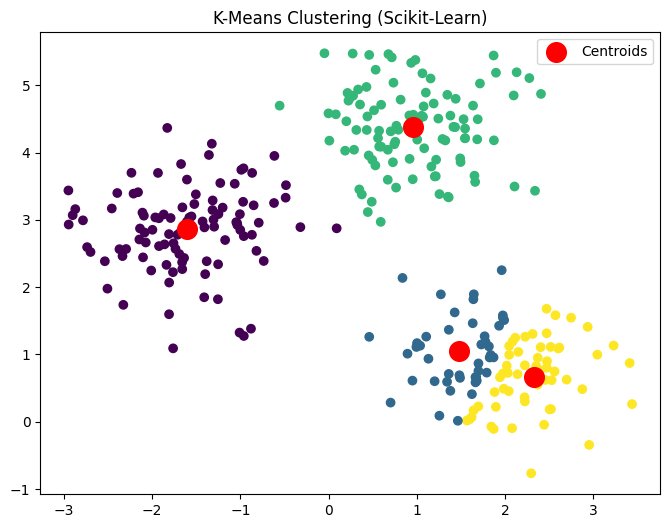

In [ ]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering (Scikit-Learn)')
plt.legend()
plt.show()

In [ ]:
#euclidean
import numpy as np

def euclidean_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a - b) ** 2))

# Example usage:
point1 = [1, 2]
point2 = [4, 6]
print("Euclidean Distance:", euclidean_distance(point1, point2))


Euclidean Distance: 5.0


In [ ]:
from scipy.spatial import distance

a = [1, 2]
b = [4, 6]

euclidean = distance.euclidean(a, b)
print("Euclidean Distance:", euclidean)


Euclidean Distance: 5.0


In [ ]:
#Manhatton
from scipy.spatial import distance

a = [1, 2]
b = [4, 6]

manhattan = distance.cityblock(a, b)
print("Manhattan Distance:", manhattan)


Manhattan Distance: 7


In [ ]:
#Cosine
from scipy.spatial import distance

a = [1, 2, 3]
b = [4, 5, 6]

cosine_dist = distance.cosine(a, b)
cosine_similarity = 1 - cosine_dist

print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: 0.9746318461970762


In [ ]:
#Minkowski

from scipy.spatial import distance

a = [1, 2, 3]
b = [4, 6, 8]

# Example: p=3 (just as an example)
p = 3
minkowski_dist = distance.minkowski(a, b, p)
print(f"Minkowski Distance (p={p}):", minkowski_dist)

Minkowski Distance (p=3): 5.999999999999999


In [ ]:
#jaccard
from scipy.spatial import distance

a = [1, 1, 0, 0, 1]
b = [1, 0, 0, 1, 1]

jaccard_dist = distance.jaccard(a, b)
jaccard_sim = 1 - jaccard_dist

print("Jaccard Similarity:", jaccard_sim)


Jaccard Similarity: 0.5


In [ ]:
if 'num_likes' in df.columns:
    X = df.drop('num_likes', axis=1)
else:
    X = df.copy()

# Handle missing values and scale
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Agglomerative
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels_agglo = agglo.fit_predict(X_scaled)
print("\nAgglomerative Clustering labels:", labels_agglo[:100])


Agglomerative Clustering labels: [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [ ]:
#birch
birch = Birch(n_clusters=3)
labels_birch = birch.fit_predict(X_scaled)
print("\nBIRCH Clustering labels:", labels_birch[:100])


BIRCH Clustering labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]


In [ ]:
#chameleon
chameleon_like = AgglomerativeClustering(n_clusters=3, linkage='average')
labels_chameleon = chameleon_like.fit_predict(X_scaled)
print(labels_chameleon)

[0 0 0 ... 0 0 0]


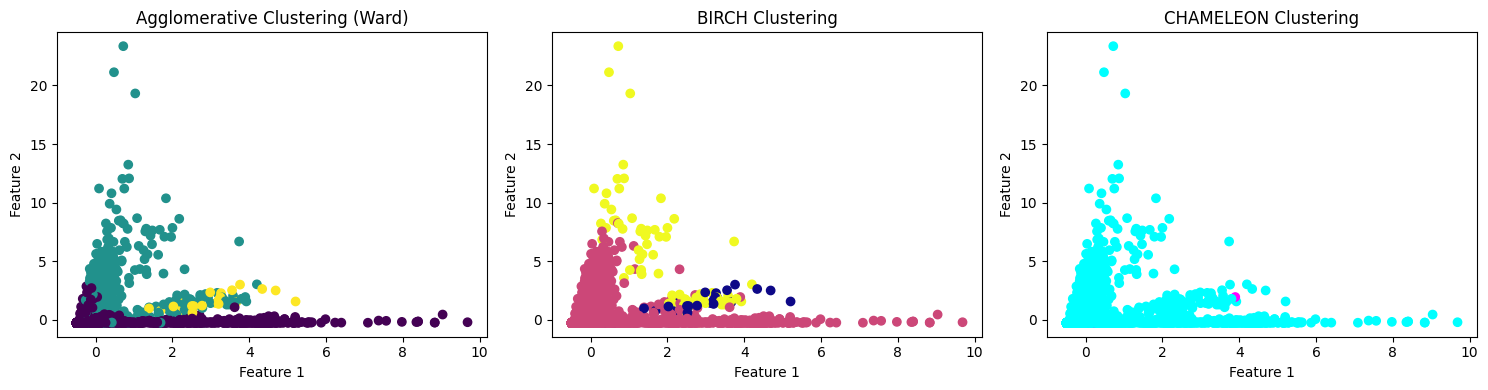

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agglo, cmap='viridis')
plt.title("Agglomerative Clustering (Ward)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_birch, cmap='plasma')
plt.title("BIRCH Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_chameleon, cmap='cool')
plt.title("CHAMELEON Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

LINKAGE

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

linkage_matrix = sch.linkage(X_scaled, method='ward')
labels_divisive = fcluster(linkage_matrix, t=3, criterion='maxclust')
print("Divisive Clustering (simulated using linkage + fcluster):")
print(labels_divisive[:100])


Divisive Clustering (simulated using linkage + fcluster):
[3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3]


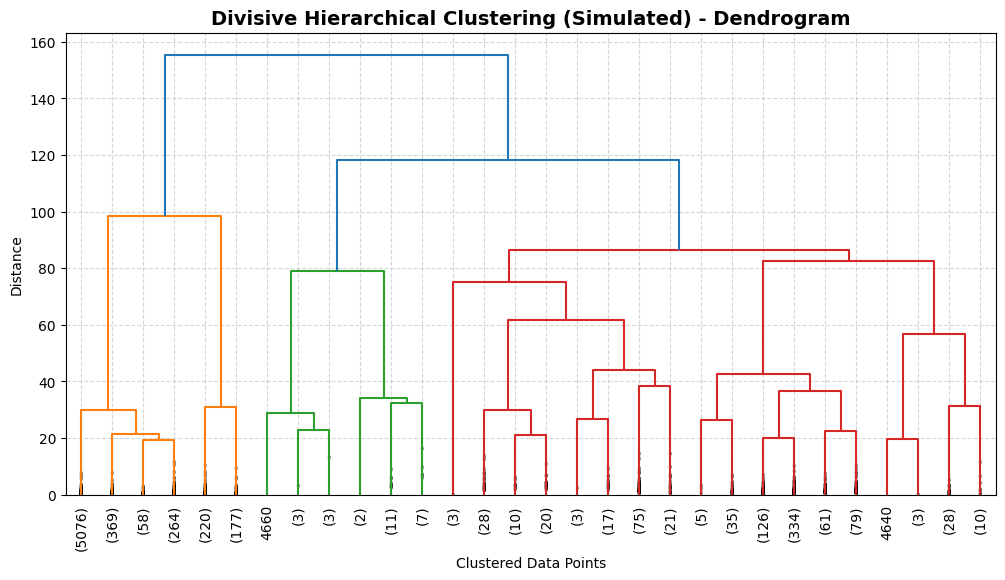

In [ ]:
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix,truncate_mode='lastp',p=30,leaf_rotation=90,leaf_font_size=10,show_contracted=True,color_threshold=None)
plt.title("Divisive Hierarchical Clustering (Simulated) - Dendrogram", fontsize=14, fontweight='bold')
plt.xlabel("Clustered Data Points")
plt.ylabel("Distance")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
linkages = ['single', 'complete', 'average', 'ward', 'centroid']
plt.figure(figsize=(15, 20))  # larger for all subplots

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

/tmp/ipython-input-971551411.py:24: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


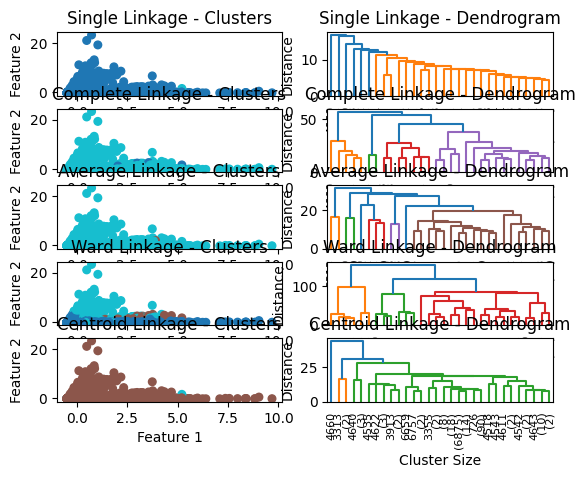

In [ ]:
# Run each linkage and plot
for i, linkage_method in enumerate(linkages):
    # Generate linkage matrix
    linkage_matrix = sch.linkage(X_scaled, method=linkage_method)

    # Get cluster labels (3 clusters)
    labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

    # ----------------- Scatter Plot -----------------
    plt.subplot(len(linkages), 2, 2*i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=30)
    plt.title(f"{linkage_method.capitalize()} Linkage - Clusters")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # ----------------- Dendrogram -----------------
    plt.subplot(len(linkages), 2, 2*i + 2)
    sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=30,
                   leaf_rotation=90, leaf_font_size=8)
    plt.title(f"{linkage_method.capitalize()} Linkage - Dendrogram")
    plt.xlabel("Cluster Size")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()


DBSCAN, SpectralClustering

In [ ]:
from sklearn.cluster import DBSCAN, SpectralClustering
dbscan = DBSCAN(eps=0.5, min_samples=5) # Tune eps and min_samples
labels_dbscan = dbscan.fit_predict(X_scaled)
print("DBSCAN Labels:", np.unique(labels_dbscan))

DBSCAN Labels: [-1  0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
assign_labels='kmeans', random_state=42)
labels_spectral = spectral.fit_predict(X_scaled)
print("Spectral Clustering Labels:", np.unique(labels_spectral))

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Labels: [0 1 2]


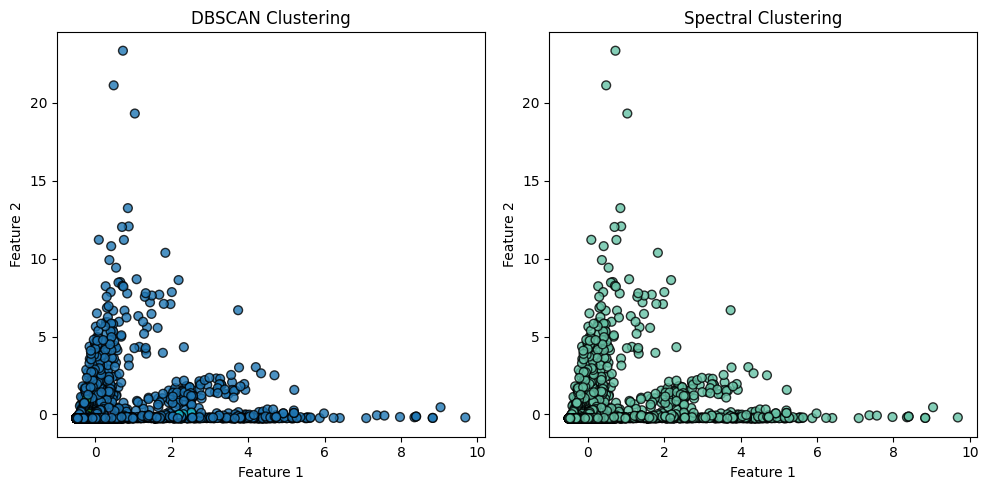

In [ ]:
plt.figure(figsize=(10, 5))

# DBSCAN
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='tab10', s=40, edgecolor='k', alpha=0.8)
plt.title("DBSCAN Clustering", fontsize=12)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Spectral Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_spectral, cmap='Set2', s=40, edgecolor='k', alpha=0.8)
plt.title("Spectral Clustering", fontsize=12)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


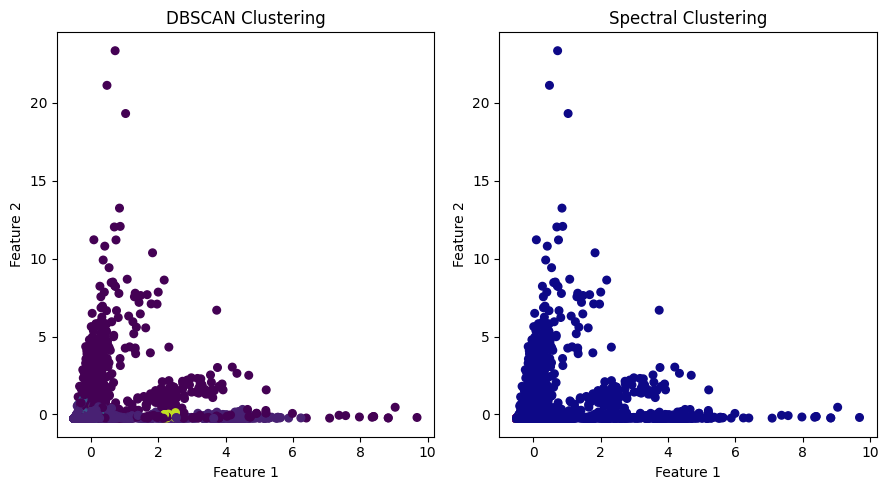

In [ ]:
plt.figure(figsize=(9, 5))
# DBSCAN
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis',
s=30)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# Spectral Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_spectral, cmap='plasma',
s=30)
plt.title("Spectral Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()